---
# The Perceptron 

## Introduction


A [Perceptron](https://en.wikipedia.org/wiki/Perceptron) is an algorithm for supervised learning of binary classifiers. It's a simplified model of a biological neuron, and it is a type of linear classifier, i.e., a classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt). 

## Algorithm 
A function that maps input $\mathbf {x}$  (a real-valued vector) to an output value $f(\mathbf {x} )$ (a single binary value) is given by

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

where $\mathbf {w}$  is a vector of real-valued weights, $\mathbf {w} \cdot \mathbf {x} = \sum_{i=1}^{m} {w_{i}x_{i}}$ is the dot product,  $m$ is the number of inputs to the perceptron, $b$ is the bias.

And the algorithm is
1. Initialize random small weights
2. For each sample $\mathbf{x}_j$ and $y_j$, perform the following steps:
   - Calculate the actual output:
$$
y_j(t) = f[\mathbf{x}_j^T\cdot\mathbf{w}(t)]
$$
   - Update the weights:
$$
\mathbf{w}(t+1) = \mathbf{w}(t) \boldsymbol{+} \cdot  \mathbf{x}_j^T(\mathbf{d} - \mathbf{y}(t))
$$

3. Updates the weights after steps 2, until meets stopping criterias.

## Illustration
> - Input signals x_n^(i) with weights x_n and personal bias(1.0)
> * pre-activation value **z**
> * post-activation value **a** by passing the input signal into activation function
> * output signal y hat^(i)



<p align="center">
    <img src="ThePerceptronImage.png" width="500">
</p>


---

---
## Dataset and Application

We will implement and train this model on the  breast cancer wisconsin dataset. 
The breast cancer dataset is a classic binary classification dataset.

---

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

# Read the breast cancer dataset into a pandas DataFrame object
df = load_breast_cancer(return_X_y=True, as_frame=True)

In [175]:
df[0].iloc[:10]
#load_breast_cancer().target[[10, 50, 85]]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


---

The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "sepal length" and "sepal width". Moreover, we need to also convert the string names associated with each species to numerical values; for example, map "setosa" species to -1 and "versicolor" species to 1. The following code preproccesses our data into these desired formats. 
```python
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values
```

---

In [177]:
# Store the desired species values in the numpy array y
y = df[1].iloc[0:100]
# Change the label of (0, 1) to (-1, 1).
y = np.where(y == 0,-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1])

In [179]:
X = df[0][["mean radius", "mean texture"]].iloc[:100].values

In [180]:
# Store the desired species values in the numpy array y
y = df[1].iloc[0:100]
y = np.where(y == 0,-1,1)
# Store the desired feature measurements in the matrix X
X = df[0][["mean radius", "mean texture"]].iloc[:100].values

In [181]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
                #print(self.errors_)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [182]:
# Instantiate one instance of the Perceptron class, train this instance over 2200 epochs
percep = Perceptron(epochs = 2200)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [183]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True False False False False  True  True False  True  True False  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True False  True  True  True  True False False False  True  True
  True  True  True  True False False False  True False False  True  True
 False  True  True  True]


---

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane. This function will scatter the breast cancer data in the plane and also show the regions of space where a given point will be classified either -1 or 1. 

---

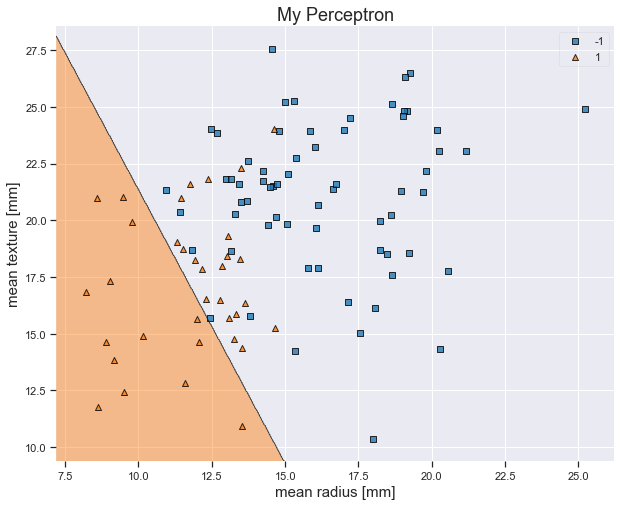

In [185]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My Perceptron", fontsize = 18)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel("mean texture [mm]", fontsize = 15)
plt.show()

A linear decision boundary created by perceptron. It is not perfect as there are still some values on the other sides of decision boundary, but it is good enough for this dataset.

---
To view these errors over each epoch. 

---

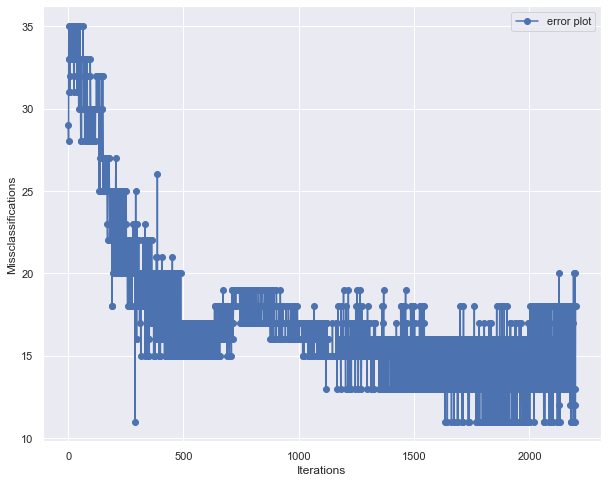

In [186]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()